In [1]:
import numpy as np 
import seaborn as sb
from sklearn.datasets import make_moons 
import pandas as pd
import matplotlib.pyplot as plt
import os
from beeprint import pp

In [2]:
a= make_moons(n_samples= 5 , noise= 0.2 , random_state=100)

In [3]:
x = np.array(a[0])
y = np.array(a[1])
x_ = x[:,0]
print(x_.shape , y.shape , x.shape)

(5,) (5,) (5, 2)


In [4]:
x1 = x[:,1]
x1.shape

(5,)

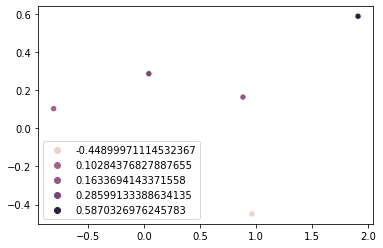

In [5]:
c = sb.scatterplot(x = x_ , y = x1 , hue = x1)

# Splitting Data into Test and Train

In [6]:
split = 0.9
xrownumber = x.shape[0]
yrownumber = y.shape[0]
xdatum = int(split * xrownumber)
ydatum = int(split * yrownumber)

In [7]:
x_train = x[0:xdatum , :]
x_test = x[xdatum: , :]
x_test.shape

(1, 2)

In [8]:
y_train = y[0:ydatum]
y_test = y[ydatum:, ]
y_test.shape

(1,)

# Structure of Neural Net

In [9]:
neuralnet = [
    {"input_layer" : 2 , "output_layer" : 5 , "activation" : "relu"} ,
 #   {"input_layer" : 25 , "output_layer" : 50 , "activation" : "relu"} ,
 #   {"input_layer" : 50 , "output_layer" : 50 , "activation" : "relu"} ,
 #   {"input_layer" : 50 , "output_layer" : 25 , "activation" : "relu"} ,
    {"input_layer" : 5 , "output_layer" : 1 , "activation" : "sigmoid"} ,
]   

In [10]:
def first_layer(neuralnet , seed = 42):
    np.random.seed(seed)
    weights_baise = {}
    
    for idx , layer in enumerate(neuralnet):
        layer_idx = idx + 1
        input_size = layer["input_layer"]
        output_size = layer["output_layer"]
        weights_baise["W" + str(layer_idx)] = np.random.randn(output_size , input_size) * 0.1
        weights_baise["b" + str(layer_idx)] = np.random.randn(output_size , 1) * 0.1
    
    return weights_baise


In [11]:
pp(first_layer(neuralnet, 42))

{
  'W1': array([[ 0.04967142, -0.01382643],
       [ 0.06476885,  0.15230299],
       [-0.02341534, -0.0234137 ],
       [ 0.15792128,  0.07674347],
       [-0.04694744,  0.054256  ]])
  'W2': array([[-0.05622875, -0.10128311,  0.03142473, -0.09080241, -0.14123037]])
  'b1': array([[-0.04634177],
       [-0.04657298],
       [ 0.02419623],
       [-0.19132802],
       [-0.17249178]])
  'b2': array([[0.14656488]])
}


# Activation Function

In [12]:
def sigmoid (Z):
    return 1 / ( 1 + np.exp( - Z))

def sigmoid_backprop(dA , Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu(Z):
    return np.maximum(0 , Z)

def relu_backprop(dA , Z):
    dZ = np.array(dA , copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [13]:
def single_forward_layer(A_prev , W_curr , b_curr , activation = "relu"):
    Z_curr = np.dot(W_curr , A_prev ) + b_curr
    
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception("activation function not defined")
    
    return activation_func(Z_curr) , Z_curr

# Forward Propagation

In [14]:
def full_forward_layer(neuralnet , weights_baise , x):
    memory = {}
    A_curr = x
    data = []
    for idx , layer in enumerate(neuralnet):
        layer_idx = idx + 1
        A_prev = A_curr
        activation_func = layer["activation"]
        W_curr =  weights_baise["W" + str(layer_idx)] 
        b_curr =  weights_baise["b" + str(layer_idx)]
        A_curr , Z_curr = single_forward_layer(A_prev , W_curr , b_curr , activation_func)
        
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
        data.append([{"index" : idx ,"A_prev" : A_prev , "W_curr" : W_curr ,"b_curr" : b_curr , "Z_curr" : Z_curr , "A_curr" : A_curr}])
    
    return memory , A_curr , data

In [15]:
weights_baise_ = first_layer(neuralnet , 42)

In [16]:
 _ , _ , data = full_forward_layer(neuralnet , weights_baise_ , x_train.T)
pp(data)

[
  [
    {
      'A_curr': array([[0.        , 0.        , 0.0076552 , 0.04033433],
       [0.        , 0.        , 0.        , 0.16643839],
       [0.04060802, 0.01646431, 0.01218105, 0.        ],
       [0.        , 0.        , 0.        , 0.15509902],
       [0.        , 0.        , 0.        , 0.        ]])
      'A_prev': array([[-0.80373584,  0.04423593,  0.96210083,  1.9083946 ],
       [ 0.10284377,  0.28599133, -0.44899971,  0.5870327 ]])
      'W_curr': array([[ 0.04967142, -0.01382643],
       [ 0.06476885,  0.15230299],
       [-0.02341534, -0.0234137 ],
       [ 0.15792128,  0.07674347],
       [-0.04694744,  0.054256  ]])
      'Z_curr': array([[-8.76864283e-02, -4.80987470e-02,  7.65520393e-03,
         4.03343250e-02],
       [-8.29666117e-02, -1.50530606e-04, -5.26428037e-02,
         1.66438388e-01],
       [ 4.06080205e-02,  1.64643138e-02,  1.21810541e-02,
        -3.42340814e-02],
       [-3.10362431e-01, -1.62394261e-01, -7.38496250e-02,
         1.55099025e-01],

In [17]:
memory , y_hat_train , _ =   full_forward_layer(neuralnet , weights_baise_ , x_train.T)

# Loss Function

In [18]:
def cost_value(y , y_hat):
    m = y_hat.shape[1]
    cost = - 1 / m * (np.dot(y , np.log(y_hat).T) + np.dot(1 - y , np.log(1 - y_hat).T))
    return np.squeeze(cost)

def probtoclass(prob):
    prob_ = np.copy(prob)
    prob_[prob_ > 0.5] = 1
    prob_[prob_ <= 0.5] = 0
    return prob_

def accuracy_value(y , y_hat):
    y_hat_ = probtoclass(y_hat)
    return (y_hat_ == y).all(axis = 0).mean()
    
    


In [19]:
#np.transpose(y_train.reshape((y_train.shape[0] , 1)))

CV = cost_value(y_train.reshape((y_train.shape[0] , 1)).T , y_hat_train )
ptoc = probtoclass(y_hat_train)
AV = accuracy_value(y_train.reshape((y_train.shape[0] , 1)).T , y_hat_train)
print("y_train data" ,y_train)
print("y_train changed" , y_train.reshape((y_train.shape[0] , 1)).T)
print("A_curr / y_hat" ,y_hat_train)
print("costvalue" , CV )
print("probtoclass" , ptoc)
print("accuracyvalue" , AV)

y_train data [0 1 1 1]
y_train changed [[0 1 1 1]]
A_curr / y_hat [[0.53689307 0.53670442 0.53656392 0.52830873]]
costvalue 0.6631872730484996
probtoclass [[1. 1. 1. 1.]]
accuracyvalue 0.75


In [20]:
def single_backprop(dA_curr , Z_curr , A_prev , W_curr , b_curr , activation = "relu"):
    m = A_prev.shape[1]
    
    if activation is "relu":
        activation_func = relu_backprop
    elif activation is "sigmoid":
        activation_func = sigmoid_backprop
    else:
        raise Exception("activation function not defined")
        
    dZ_curr = activation_func(dA_curr , Z_curr)
    dW_curr = np.dot(dZ_curr , A_prev.T) / m
    db_curr = np.sum(dZ_curr , axis = 1 , keepdims= True ) / m
    dA_prev = np.dot(W_curr.T , dZ_curr)
    
    return dA_prev , dW_curr , db_curr ,dZ_curr

# Back Propagation

In [21]:
def full_backprop(y , y_hat , memory , weights_baise, neuralnet ):
    grad_value = {}
    backprop_data = []
    m = y.shape[1]
    y = y.reshape(y_hat.shape)
    
    dA_prev = - (np.divide(y , y_hat) - np.divide(1- y , 1 - y_hat));
    
    for idx , layer in reversed(list(enumerate(neuralnet))):
        layer_idx = idx + 1
        activation_func = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(idx)]
        Z_curr = memory["Z" + str(layer_idx)]
        
        W_curr = weights_baise["W" + str(layer_idx)]
        b_curr =  weights_baise["b" + str(layer_idx)]
        
        dA_prev , dW_curr , db_curr , dZ_curr = single_backprop(dA_curr , Z_curr , A_prev , W_curr , b_curr , activation_func)
        
        grad_value["dW" + str(layer_idx)] = dW_curr
        grad_value["db" + str(layer_idx)] = db_curr
        
        backprop_data.append([{"idx" : idx ,"Y_train reshape" : y_train.reshape((y_train.shape[0] , 1)),"Y_hat/A_curr" : y_hat_train, "dA_prev/singleback" : dA_prev , "dA_curr/ dA_prev divid" : dA_curr , "Z_curr" : Z_curr , "dZ_curr" : dZ_curr , "dW_curr" : dW_curr , "db_curr" : db_curr , "m": m}])
    
    return grad_value , backprop_data

In [22]:
#y_train.reshape((y_train.shape[0] , 1)).T , y_hat_train
grad_value , _ = full_backprop(y_train.reshape((y_train.shape[0] , 1)) , y_hat_train , memory , weights_baise_ , neuralnet)
grad_value

{'dW2': array([[-0.00564326, -0.01962688,  0.0021323 , -0.01828971,  0.        ]]),
 'db2': array([[-0.21538246]]),
 'dW1': array([[ 0.01892161,  0.00096735],
        [ 0.02279308,  0.00701128],
        [-0.00705396,  0.00102759],
        [ 0.02043447,  0.00628576],
        [ 0.        ,  0.        ]]),
 'db1': array([[ 0.01314526],
        [ 0.01194359],
        [-0.00306264],
        [ 0.01070768],
        [ 0.        ]])}

In [23]:
_ , backprop_data = full_backprop(y_train.reshape((y_train.shape[0] , 1)) , y_hat_train , memory , weights_baise_ , neuralnet)

pp(data)
pp(backprop_data)

[
  [
    {
      'A_curr': array([[0.        , 0.        , 0.0076552 , 0.04033433],
       [0.        , 0.        , 0.        , 0.16643839],
       [0.04060802, 0.01646431, 0.01218105, 0.        ],
       [0.        , 0.        , 0.        , 0.15509902],
       [0.        , 0.        , 0.        , 0.        ]])
      'A_prev': array([[-0.80373584,  0.04423593,  0.96210083,  1.9083946 ],
       [ 0.10284377,  0.28599133, -0.44899971,  0.5870327 ]])
      'W_curr': array([[ 0.04967142, -0.01382643],
       [ 0.06476885,  0.15230299],
       [-0.02341534, -0.0234137 ],
       [ 0.15792128,  0.07674347],
       [-0.04694744,  0.054256  ]])
      'Z_curr': array([[-8.76864283e-02, -4.80987470e-02,  7.65520393e-03,
         4.03343250e-02],
       [-8.29666117e-02, -1.50530606e-04, -5.26428037e-02,
         1.66438388e-01],
       [ 4.06080205e-02,  1.64643138e-02,  1.21810541e-02,
        -3.42340814e-02],
       [-3.10362431e-01, -1.62394261e-01, -7.38496250e-02,
         1.55099025e-01],

# breakdown of parts in last layer as first layer back propagation

### getting the value of dZ_curr

In [24]:
((list(data)[1])[0])["W_curr"]


array([[-0.05622875, -0.10128311,  0.03142473, -0.09080241, -0.14123037]])

In [25]:
A_prev1 = np.array(((list(data)[1])[0])["A_prev"])
W_curr1 = np.array(((list(data)[1])[0])["W_curr"])


Z_curr1 = np.array(((list(data)[1])[0])["Z_curr"])
#m = y_train.reshape((y_train.shape[0] , 1)).shape[1]
m = A_prev1.shape[1]
print("A_prev1" , A_prev1)
print("W_curr1" , W_curr1)
print("Z_curr1" , Z_curr1)

A_prev1 [[0.         0.         0.0076552  0.04033433]
 [0.         0.         0.         0.16643839]
 [0.04060802 0.01646431 0.01218105 0.        ]
 [0.         0.         0.         0.15509902]
 [0.         0.         0.         0.        ]]
W_curr1 [[-0.05622875 -0.10128311  0.03142473 -0.09080241 -0.14123037]]
Z_curr1 [[0.14784097 0.14708226 0.14651722 0.11335617]]


In [26]:
y_train_ = np.transpose(y_train.reshape((y_train.shape[0] , 1)))

In [27]:
dA_prev_To_dA_curr_ = -( np.divide(y_train_.reshape(y_hat_train.shape) , y_hat_train) - np.divide(1 - y_train_.reshape(y_hat_train.shape) ,1 - y_hat_train))

print("dA_prev_To_dA_curr_" ,dA_prev_To_dA_curr_)
print("Value of Y",np.transpose(y_train.reshape((y_train.shape[0] , 1))).reshape(y_hat_train.shape))
print("Y_hat",y_hat_train)

dA_prev_To_dA_curr_ [[ 2.15932852 -1.86322296 -1.86371086 -1.89283261]]
Value of Y [[0 1 1 1]]
Y_hat [[0.53689307 0.53670442 0.53656392 0.52830873]]


In [28]:
dZ_curr1 = sigmoid_backprop(dA_prev_To_dA_curr_ , Z_curr1)
dZ_curr1

array([[ 0.53689307, -0.46329558, -0.46343608, -0.47169127]])

### checking value of dW_curr

In [29]:
dW_curr1 = np.dot(dZ_curr1 , A_prev1.T)  /  m # this part is m
db_curr1 = np.sum(dZ_curr1 , axis = 1 , keepdims = True) / m

print("dW_curr" , dW_curr1)
print("db_curr" , db_curr1)


dW_curr [[-0.00564326 -0.01962688  0.0021323  -0.01828971  0.        ]]
db_curr [[-0.21538246]]



### checking value of dA_prev

In [30]:
#dA_prev = np.dot(W_curr.T , dZ_curr)
dA_prev1 = np.dot(np.transpose(W_curr1 ), dZ_curr1) 
dA_prev1

array([[-0.03018883,  0.02605053,  0.02605843,  0.02652261],
       [-0.0543782 ,  0.04692402,  0.04693825,  0.04777436],
       [ 0.01687172, -0.01455894, -0.01456336, -0.01482277],
       [-0.04875118,  0.04206835,  0.04208111,  0.0428307 ],
       [-0.07582561,  0.06543141,  0.06545125,  0.06661713]])

# breakdown of parts in second layer back propagation

In [31]:
((list(data)[0])[0])["Z_curr"]

array([[-8.76864283e-02, -4.80987470e-02,  7.65520393e-03,
         4.03343250e-02],
       [-8.29666117e-02, -1.50530606e-04, -5.26428037e-02,
         1.66438388e-01],
       [ 4.06080205e-02,  1.64643138e-02,  1.21810541e-02,
        -3.42340814e-02],
       [-3.10362431e-01, -1.62394261e-01, -7.38496250e-02,
         1.55099025e-01],
       [-1.29178552e-01, -1.59051800e-01, -2.42020883e-01,
        -2.30235973e-01]])

In [32]:
A_prev0 = np.array(((list(data)[0])[0])["A_prev"])

W_curr0 = np.array(((list(data)[0])[0])["W_curr"])


Z_curr0 = np.array(((list(data)[0])[0])["Z_curr"])

#m = y_train.reshape((y_train.shape[0] , 1)).shape[1]
m = A_prev1.shape[1]

print("A_prev0" , A_prev0)
print("W_curr0" , W_curr0)
print("Z_curr0" , Z_curr0)

A_prev0 [[-0.80373584  0.04423593  0.96210083  1.9083946 ]
 [ 0.10284377  0.28599133 -0.44899971  0.5870327 ]]
W_curr0 [[ 0.04967142 -0.01382643]
 [ 0.06476885  0.15230299]
 [-0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347]
 [-0.04694744  0.054256  ]]
Z_curr0 [[-8.76864283e-02 -4.80987470e-02  7.65520393e-03  4.03343250e-02]
 [-8.29666117e-02 -1.50530606e-04 -5.26428037e-02  1.66438388e-01]
 [ 4.06080205e-02  1.64643138e-02  1.21810541e-02 -3.42340814e-02]
 [-3.10362431e-01 -1.62394261e-01 -7.38496250e-02  1.55099025e-01]
 [-1.29178552e-01 -1.59051800e-01 -2.42020883e-01 -2.30235973e-01]]


In [33]:
dA_prev_To_dA_curr_0 = dA_prev1

print("dA_prev_To_dA_curr_" ,dA_prev_To_dA_curr_0)

print("Value of Y",np.transpose(y_train.reshape((y_train.shape[0] , 1))).reshape(y_hat_train.shape))

print("Y_hat",y_hat_train)

dA_prev_To_dA_curr_ [[-0.03018883  0.02605053  0.02605843  0.02652261]
 [-0.0543782   0.04692402  0.04693825  0.04777436]
 [ 0.01687172 -0.01455894 -0.01456336 -0.01482277]
 [-0.04875118  0.04206835  0.04208111  0.0428307 ]
 [-0.07582561  0.06543141  0.06545125  0.06661713]]
Value of Y [[0 1 1 1]]
Y_hat [[0.53689307 0.53670442 0.53656392 0.52830873]]


In [34]:
dZ_curr0 = relu_backprop(dA_prev_To_dA_curr_0 , Z_curr0)
dZ_curr0

array([[ 0.        ,  0.        ,  0.02605843,  0.02652261],
       [ 0.        ,  0.        ,  0.        ,  0.04777436],
       [ 0.01687172, -0.01455894, -0.01456336,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.0428307 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### checking value of dW_curr

In [35]:
dW_curr0 = np.dot(dZ_curr0 , A_prev0.T)  /  m # this part is m
db_curr0 = np.sum(dZ_curr0 , axis = 1 , keepdims = True) / m

print("dW_curr" , dW_curr0)
print("db_curr" , db_curr0)


dW_curr [[ 0.01892161  0.00096735]
 [ 0.02279308  0.00701128]
 [-0.00705396  0.00102759]
 [ 0.02043447  0.00628576]
 [ 0.          0.        ]]
db_curr [[ 0.01314526]
 [ 0.01194359]
 [-0.00306264]
 [ 0.01070768]
 [ 0.        ]]


### checking value of dA_prev

In [36]:
dA_prev0 = np.dot(np.transpose(W_curr0 ), dZ_curr0) 
dA_prev0

array([[-3.95057053e-04,  3.40902494e-04,  1.63536512e-03,
         1.11755856e-02],
       [-3.95029354e-04,  3.40878591e-04, -1.93131338e-05,
         1.01964414e-02]])

In [37]:
b_curr0 = np.array(((list(data)[0])[0])["b_curr"])
b_curr1 = np.array(((list(data)[1])[0])["b_curr"])

# Updating Gradient descent

In [38]:
def update(neuralnet, learning_rate , grad_value , weights_baise):
    
    for layer_idx , layer in enumerate(neuralnet , 1):
    
        weights_baise["W" + str(layer_idx)] -= learning_rate *  grad_value["dW" + str(layer_idx)]
        weights_baise["b" + str(layer_idx)] -= learning_rate *  grad_value["db" + str(layer_idx)]
    
    return weights_baise
    

#####  running the below code of "update" changes the values of weights andd baise so when "train" function is used it gives different values of weights and baise. it changes the previous values of W_curr and b_curr

In [39]:
weights_baise__ = update(neuralnet , 0.01 , grad_value , weights_baise_)
pp(weights_baise__)

{
  'W1': array([[ 0.0494822 , -0.0138361 ],
       [ 0.06454092,  0.15223287],
       [-0.0233448 , -0.02342397],
       [ 0.15771694,  0.07668062],
       [-0.04694744,  0.054256  ]])
  'W2': array([[-0.05617232, -0.10108684,  0.03140341, -0.09061951, -0.14123037]])
  'b1': array([[-0.04647322],
       [-0.04669241],
       [ 0.02422685],
       [-0.1914351 ],
       [-0.17249178]])
  'b2': array([[0.1487187]])
}


In [50]:
#((list(data)[0])[0])
print(dW_curr0)
print(W_curr0)
print(dW_curr1)
print(W_curr1)

[[ 0.01892161  0.00096735]
 [ 0.02279308  0.00701128]
 [-0.00705396  0.00102759]
 [ 0.02043447  0.00628576]
 [ 0.          0.        ]]
[[ 0.04967142 -0.01382643]
 [ 0.06476885  0.15230299]
 [-0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347]
 [-0.04694744  0.054256  ]]
[[-0.00564326 -0.01962688  0.0021323  -0.01828971  0.        ]]
[[-0.05622875 -0.10128311  0.03142473 -0.09080241 -0.14123037]]


In [41]:
weightupdate1 = W_curr0 - 0.01 * dW_curr0
weightupdate2 = W_curr1 - 0.01 * dW_curr1
baiseupadte1 =  b_curr0 - 0.01 * db_curr0
baiseupdate2 =  b_curr1 - 0.01 * db_curr1

print("weightupdate1" , weightupdate1)
print("weightupdate2" , weightupdate2)
print("baiseupadte1" , baiseupadte1)
print("baiseupdate2" , baiseupdate2)

weightupdate1 [[ 0.0494822  -0.0138361 ]
 [ 0.06454092  0.15223287]
 [-0.0233448  -0.02342397]
 [ 0.15771694  0.07668062]
 [-0.04694744  0.054256  ]]
weightupdate2 [[-0.05617232 -0.10108684  0.03140341 -0.09061951 -0.14123037]]
baiseupadte1 [[-0.04647322]
 [-0.04669241]
 [ 0.02422685]
 [-0.1914351 ]
 [-0.17249178]]
baiseupdate2 [[0.1487187]]


# Training the Model

In [42]:
def train(x , y , learning_rate  , epoch , neuralnet , callback = None , lossfunction = False ):
    cost_value_history = []
    accuracy_value_history = []
    
    back_prop_history = []
    lossfunc = []
    updatedweight_baise = []
    weights_baise = first_layer(neuralnet , 42)
    forward_prop_history = []
    
    for i in range(epoch):
        
       
    
        memory , y_hat , data = full_forward_layer(neuralnet , weights_baise , x)
        
        forward_prop_history.append([i , data])
        
        cost = cost_value(y , y_hat)
        cost_value_history.append(cost)
        accuracy = accuracy_value(y , y_hat)
        accuracy_value_history.append(accuracy)
        
    
        grad_value , backprop_data = full_backprop(y , y_hat , memory , weights_baise, neuralnet )
        
        back_prop_history.append([i , backprop_data])
    
        weights_baise = update(neuralnet, learning_rate , grad_value , weights_baise)
        
        updatedweight_baise.append([{"loop" : i , "weightsafterlearning" : weights_baise}])
        
        
        
        
        
        
        if (i % 100 == 0):
        
            if(lossfunction is not None):
                lossfunc.append([i , cost , accuracy])
            if(callback is not None):
                callback(i , weights_baise)
    
    
    return weights_baise , lossfunc , forward_prop_history , back_prop_history , updatedweight_baise
    

In [43]:
weights_baise , lossfunc , forward_prop_history , back_prop_history , updatedweight_baise = train(x_train.T , y_train_ , 0.01  , 1 , neuralnet , callback = None , lossfunction = None )


# Using weights and baise with Test data

In [44]:
_, Y_test_hat , _ = full_forward_layer(neuralnet  , weights_baise , np.transpose(x_test))
Y_test_hat

array([[0.53622688]])

In [45]:
# Accuracy achieved on the test set
acc_test = accuracy_value( np.transpose(y_test.reshape((y_test.shape[0], 1))) , Y_test_hat )
print((acc_test))

0.0


In [46]:
print("forward_prop_history" , forward_prop_history[0])
#pp(updatedweight_baise)
#pp(forward_prop_history[0])

#print("back_prop_history" , back_prop_history)

forward_prop_history [0, [[{'index': 0, 'A_prev': array([[-0.80373584,  0.04423593,  0.96210083,  1.9083946 ],
       [ 0.10284377,  0.28599133, -0.44899971,  0.5870327 ]]), 'W_curr': array([[ 0.0494822 , -0.0138361 ],
       [ 0.06454092,  0.15223287],
       [-0.0233448 , -0.02342397],
       [ 0.15771694,  0.07668062],
       [-0.04694744,  0.054256  ]]), 'b_curr': array([[-0.04647322],
       [-0.04669241],
       [ 0.02422685],
       [-0.1914351 ],
       [-0.17249178]]), 'Z_curr': array([[-8.76864283e-02, -4.80987470e-02,  7.65520393e-03,
         4.03343250e-02],
       [-8.29666117e-02, -1.50530606e-04, -5.26428037e-02,
         1.66438388e-01],
       [ 4.06080205e-02,  1.64643138e-02,  1.21810541e-02,
        -3.42340814e-02],
       [-3.10362431e-01, -1.62394261e-01, -7.38496250e-02,
         1.55099025e-01],
       [-1.29178552e-01, -1.59051800e-01, -2.42020883e-01,
        -2.30235973e-01]]), 'A_curr': array([[0.        , 0.        , 0.0076552 , 0.04033433],
       [0.   

In [47]:
pp(updatedweight_baise)

[
  [
    {
      'loop': 0,
      'weightsafterlearning': {
        'W1': array([[ 0.0494822 , -0.0138361 ],
       [ 0.06454092,  0.15223287],
       [-0.0233448 , -0.02342397],
       [ 0.15771694,  0.07668062],
       [-0.04694744,  0.054256  ]])
        'W2': array([[-0.05617232, -0.10108684,  0.03140341, -0.09061951, -0.14123037]])
        'b1': array([[-0.04647322],
       [-0.04669241],
       [ 0.02422685],
       [-0.1914351 ],
       [-0.17249178]])
        'b2': array([[0.1487187]])
      },
    },
  ],
]


In [48]:
#lossfun = np.array(lossfunc , copy = True )[:,0:2]
#lossfun.shape
lossfunc

[]

# graph of loss function

In [ ]:
#loss_function__ = plt.plot(lossfun[:,0] , lossfun [:,1])

In [ ]:
# def make_plot(X , Y, file_name=None, XX=None, YY=None, preds=None):

#     if(XX is not None and YY is not None and preds is not None):
#         plt.contourf(XX, YY, preds.reshape(XX.shape))
#         plt.contour(XX, YY, preds.reshape(XX.shape))
#     plt.scatter(X[:, 0], X[:, 1])
#     if(file_name):
#         plt.savefig(file_name)
#         plt.close()

# using numpy.mgrid to plot the values

In [ ]:
# location = "E:\\python folder\\images\\"
# grid = np.mgrid[-1.5:2.5:100j,-1.5:2:100j]
# grid_2d = grid.reshape(2, -1).T
# XX, YY = grid

In [ ]:
# def callbacks(index , weights_baise):
#     file_name = str(index//100)
#     file_path = os.path.join(location, file_name)
    
#     _ , prediction = full_forward_layer(neuralnet , weights_baise, np.transpose(grid_2d))
#     prediction = prediction.reshape(prediction.shape[1], 1)
#     make_plot(x_test,y_test , file_name=file_path, XX=XX, YY=YY, preds=prediction)
    
# def lossfunction(index , cost , accuracy):
    
#     return index , cost , accuracy

In [ ]:
#     _ , prediction_ , _ = full_forward_layer(neuralnet , weights_baise, np.transpose(grid_2d))
#     prediction_ = prediction_.reshape(prediction_.shape[1], 1)
#     make_plot(x_test,y_test , file_name=None, XX=XX, YY=YY, preds=prediction_)
    
    

In [ ]:
# grid.shape

In [ ]:
# grid_2d.shape

In [ ]:
# prediction_.shape